In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from  pathlib import Path

fraud_data = Path("../../../data/miscel/fraud_data.csv")
data_file = fraud_data.as_posix()

In [4]:
df = pd.read_csv(data_file,index_col=0)

(399999, 10)


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
18,PAYMENT,23418.59,C614454039,165.00,0.00,M2054593336,0.0,0.00,0,0
18,CASH_OUT,7238.40,C627472845,25561.00,18322.60,C1760562417,3168.0,10406.40,0,0
18,CASH_IN,67545.15,C822021693,10594.00,78139.15,C729942809,0.0,62937.59,0,0


number of Nan values  0
fraud proportion isFraud
0    99.9485
1     0.0515
Name: proportion, dtype: float64
fraud issue % 0.05150012875032188


<Axes: xlabel='isFraud', ylabel='count'>

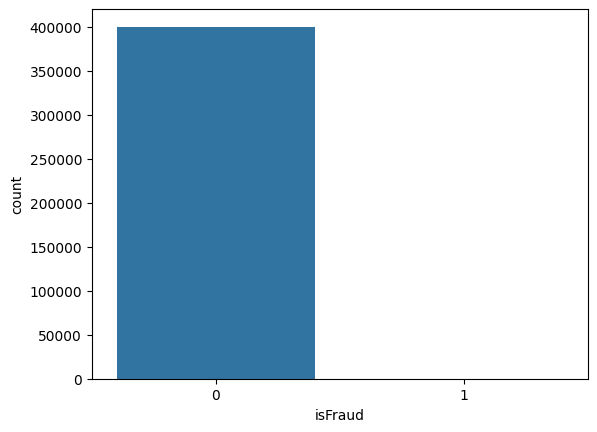

In [5]:
print (df.shape)
display (df)
print ("number of Nan values ",df.isna().sum().sum())
print ("fraud proportion",df["isFraud"].value_counts(normalize=True)*100)
fraud = (df["isFraud"].value_counts(normalize=True)*100)[1]
print ("fraud issue %", fraud)
sns.countplot(data=df,x="isFraud")


In [9]:
# create variables
y = df ["isFraud"]
# remove string variables
X = df.drop(columns=["isFraud","type","nameOrig","nameDest","isFlaggedFraud"])

# split data
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=.2,random_state=42,train_size=0.4)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report)
import warnings
warnings.filterwarnings('ignore')


print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(algorithm="kd_tree",n_jobs=-1),
    'Naive Bayes': GaussianNB(),
    'EllipticEnvelope': EllipticEnvelope(contamination=0.002,support_fraction=0.9),
    'LocalOutlierFactor':LocalOutlierFactor (n_neighbors=10, algorithm='auto', metric='euclidean', contamination=0.002),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),


}

# Train and evaluate models
results = []

print("\n" + "="*80)
print("TRAINING AND EVALUATING MODELS")
print("="*80)

for name, model in models.items():
    print(f"\n{name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # ROC-AUC (if probability predictions available)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')
    cv_mean = cv_scores.mean()
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV F1-Score': cv_mean
    })
    
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    if roc_auc:
        print(f"  ROC-AUC: {roc_auc:.4f}")
    print(f"  CV F1-Score: {cv_mean:.4f}")

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False)

print("\n" + "="*80)
print("MODEL COMPARISON (Sorted by F1-Score)")
print("="*80)
print(results_df.to_string(index=False))

# Get best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"\n" + "="*80)
print(f"BEST MODEL: {best_model_name}")
print("="*80)

# Detailed evaluation of best model
y_pred_best = best_model.predict(X_test_scaled)

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)
print(cm)
print(f"\nTrue Negatives: {cm[0][0]}")
print(f"False Positives: {cm[0][1]}")
print(f"False Negatives: {cm[1][0]}")
print(f"True Positives: {cm[1][1]}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Feature importance (if available)
if hasattr(best_model, 'feature_importances_'):
    print("\nTop 10 Most Important Features:")
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    print(feature_importance.head(10).to_string(index=False))

print("\n" + "="*80)
print("FRAUD DETECTION ANALYSIS COMPLETE")
print("="*80)


Training set size: 159999
Test set size: 80000

TRAINING AND EVALUATING MODELS

Logistic Regression...
  Accuracy: 0.9995
  Precision: 0.0000
  Recall: 0.0000
  F1-Score: 0.0000
  ROC-AUC: 0.7124
  CV F1-Score: 0.0433

Random Forest...
  Accuracy: 0.9996
  Precision: 0.9167
  Recall: 0.2821
  F1-Score: 0.4314
  ROC-AUC: 0.8693
  CV F1-Score: 0.2508

Decision Tree...
  Accuracy: 0.9994
  Precision: 0.3830
  Recall: 0.4615
  F1-Score: 0.4186
  ROC-AUC: 0.7306
  CV F1-Score: 0.3255

K-Nearest Neighbors...
  Accuracy: 0.9995
  Precision: 1.0000
  Recall: 0.0513
  F1-Score: 0.0976
  ROC-AUC: 0.6915
  CV F1-Score: 0.0222

Naive Bayes...
  Accuracy: 0.9857
  Precision: 0.0106
  Recall: 0.3077
  F1-Score: 0.0205
  ROC-AUC: 0.7268
  CV F1-Score: 0.0132

AdaBoost...
  Accuracy: 0.9996
  Precision: 1.0000
  Recall: 0.2051
  F1-Score: 0.3404
  ROC-AUC: 0.9321
  CV F1-Score: 0.1222

Gradient Boosting...
  Accuracy: 0.9995
  Precision: 0.4545
  Recall: 0.2564
  F1-Score: 0.3279
  ROC-AUC: 0.8566
  